In [6]:
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [7]:
# Your Twitter API Keys
key = 'evX5kJll0C8sMhUkt812CnSpx'
secret = 'ou6c7uxhbGlsQ6yfhIMmkT3WcVxNlEza9KJ6f8bZLdf0YrtELD'
access_token = '942094709844881419-AI8Zy6T7ueCrtJi6xk17JZ4S6XrPv7A'
access_token_secret = 'ZVterA2YsDb3DCchSVcS9HmqTZM3N7eiaQN0UekpxzgkR'

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(key, secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [8]:
sentiment_values = []

def NEWS(name):
    public_tweets = api.search(name, count = 100, result_type = "recent")
    tweetnumber = 1
    
    for tweet in public_tweets["statuses"]:
        
        
        

        compound_sen = analyzer.polarity_scores(tweet["text"])["compound"]
        pos_sen = analyzer.polarity_scores(tweet["text"])["pos"]
        neu_sen = analyzer.polarity_scores(tweet["text"])["neu"]
        neg_sen = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = tweetnumber
        
        sentiment_values.append({"News Organization": name,
                               "Compound": compound_sen,
                               "Positive": pos_sen,
                               "Negative": neg_sen,
                               "Neutral": neu_sen,
                               "Text": tweet["text"],
                               "Date": tweet["created_at"],
                               "Tweet Count" : tweetnumber})
        
        tweetnumber += 1
        
NEWS('CNN')
NEWS('CBSNews')
NEWS('FoxNews')
NEWS('NYTimes')
NEWS('BBC')

Sentiments_DataFrame=pd.DataFrame.from_dict(sentiment_values)
Sentiments_DataFrame.head()

,Compound,Date,Negative,Neutral,News Organization,Positive,Text,Tweet Count
0,-0.4019,Sun Jan 14 00:10:30 +0000 2018,0.137,0.863,CNN,0.0,@sparkey909w @FoxNews @BarackObama @CNN @MSNBC...,1
1,0.0000,Sun Jan 14 00:10:30 +0000 2018,0.000,1.000,CNN,0.0,RT @bchris1699: @CNN https://t.co/IPLCXKczFD,2
2,0.0000,Sun Jan 14 00:10:30 +0000 2018,0.000,1.000,CNN,0.0,@CNN Inibi a rne a res. l v e. resi t o. gen w...,3
3,-0.7845,Sun Jan 14 00:10:30 +0000 2018,0.239,0.761,CNN,0.0,"RT @CNN: ""This is the real face of Donald Trum...",4
4,0.0000,Sun Jan 14 00:10:30 +0000 2018,0.000,1.000,CNN,0.0,RT @Advil: the real question is why in the blu...,5


In [9]:
sentiments_csv = Sentiments_DataFrame[['News Organization','Positive','Negative','Neutral','Compound','Text','Date','Tweet Count']]

sentiments_csv

,News Organization,Positive,Negative,Neutral,Compound,Text,Date,Tweet Count
0,CNN,0.000,0.137,0.863,-0.4019,@sparkey909w @FoxNews @BarackObama @CNN @MSNBC...,Sun Jan 14 00:10:30 +0000 2018,1
1,CNN,0.000,0.000,1.000,0.0000,RT @bchris1699: @CNN https://t.co/IPLCXKczFD,Sun Jan 14 00:10:30 +0000 2018,2
2,CNN,0.000,0.000,1.000,0.0000,@CNN Inibi a rne a res. l v e. resi t o. gen w...,Sun Jan 14 00:10:30 +0000 2018,3
3,CNN,0.000,0.239,0.761,-0.7845,"RT @CNN: ""This is the real face of Donald Trum...",Sun Jan 14 00:10:30 +0000 2018,4
4,CNN,0.000,0.000,1.000,0.0000,RT @Advil: the real question is why in the blu...,Sun Jan 14 00:10:30 +0000 2018,5
5,CNN,0.000,0.146,0.854,-0.3400,RT @SamClark_23: What’s crazy is 33 million do...,Sun Jan 14 00:10:30 +0000 2018,6
6,CNN,0.000,0.239,0.761,-0.7845,"RT @CNN: ""This is the real face of Donald Trum...",Sun Jan 14 00:10:30 +0000 2018,7
7,CNN,0.000,0.179,0.821,-0.3400,RT @Ms_BiAnCa_BiSa: Crazy that 33million. Only...,Sun Jan 14 00:10:30 +0000 2018,8
8,CNN,0.000,0.000,1.000,0.0000,"National Review, conservative thinkers stand a...",Sun Jan 14 00:10:30 +0000 2018,9
9,CNN,0.000,0.000,1.000,0.0000,https://t.co/RbpmReqWzf,Sun Jan 14 00:10:29 +0000 2018,10


In [30]:
news_colors={
    "CNN":"crimson",
    "CBSNews": "darkgreen",
    "FoxNews": "gold",
    "NYTimes": "magenta",
    "BBC" : "aquamarine"}

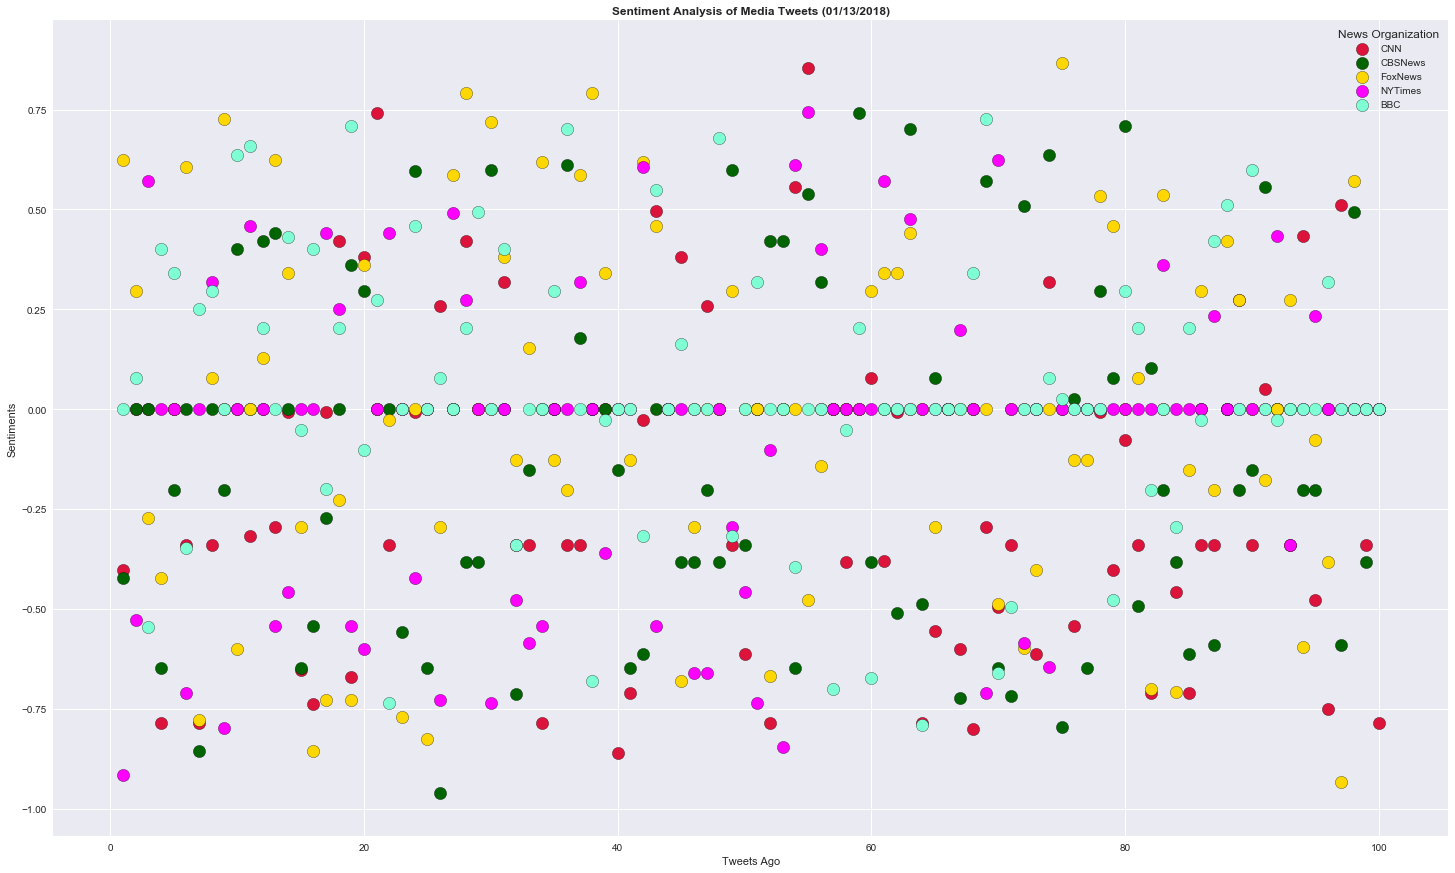

In [31]:
sns.set()

plt.figure(figsize = (25,15)) 
for news in news_colors.keys():
    news_boolean = sentiments_csv[sentiments_csv['News Organization'] == news]
    sentiment_analysis = plt.scatter(news_boolean['Tweet Count'], news_boolean['Compound'],
                                    color = news_colors[news],
                                    label = news,
                                    edgecolor= "black",
                                    s = 150 )

plt.xlabel("Tweets Ago")
plt.ylabel("Sentiment")
plt.title("Sentiment Analysis of Media Tweets (%s)" %(time.strftime("%m/%d/%Y")), fontweight='bold')
plt.legend(bbox_to_anchor = (1,1), title ='News Organization' )
plt.show()

sentiment_analysis.figure.savefig('SentimentAnalysis.png')

In [33]:
overall_sentiments = sentiments_csv.groupby("News Organization")["Compound"].mean()

x_axis = np.arange(len(overall_sentiments))

print(overall_sentiments)
print(" ")
print(x_axis)

News Organization
BBC        0.046839
CBSNews   -0.085673
CNN       -0.166208
FoxNews    0.002047
NYTimes   -0.064594
Name: Compound, dtype: float64
 
[0 1 2 3 4]


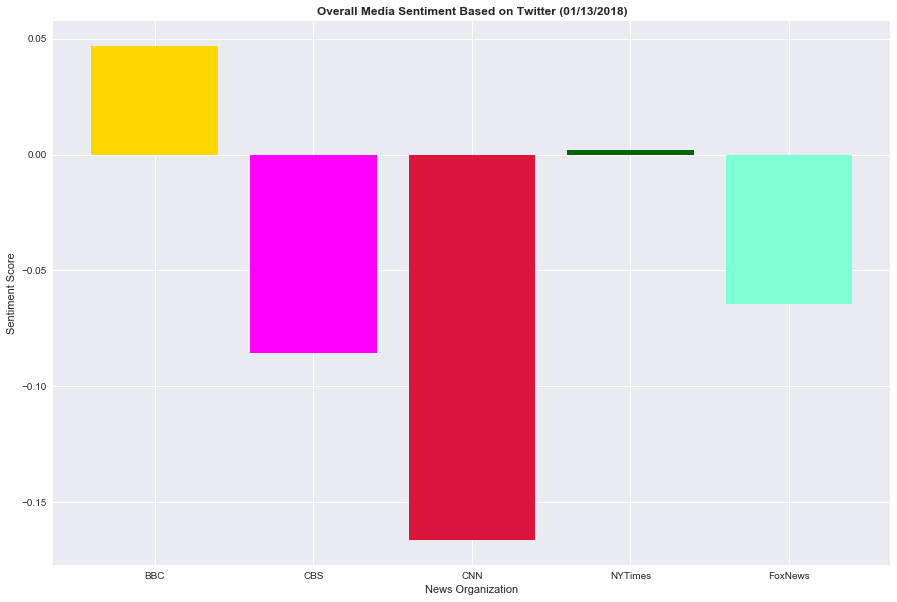

In [36]:
sns.set()

plt.figure(figsize=(15,10))

mean_sentiment_analysis = plt.bar(x_axis,
                                  overall_sentiments,
                                  color = {"crimson",
                                           "magenta",
                                           "aquamarine",
                                           "darkgreen",
                                           "gold"})

tick_locations = [value for value in x_axis]
tick_labels = "BBC", "CBS", "CNN", "NYTimes", "FoxNews"
plt.xticks(tick_locations, tick_labels)
plt.xlabel("News Organization")
plt.ylabel("Sentiment Score")
plt.title("Overall Media Sentiment Based on Twitter (%s)" %(time.strftime("%m/%d/%Y")), fontweight='bold')

plt.savefig('Overall Media Sentiment Based on Twitter.png')
    
plt.show()